In [1]:
import pandas as pd
import numpy as np
import os, sys
sys.path.insert(0, os.path.abspath('../..'))
import source.data_preparation as dp
import source.regression_models as modl
data = dp.prepare_data()


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [2]:
# Pick the monthly variables you actually have in `data`:
monthly_vars = [
    "vp","impvar","vrp","lzrt","ogap","wtexas","sntm","ndrbL","skvw","tail",
    "fbm","dtoy","dtoat","ygap","rdsp","rsvix","tchi","avgcor","shtint",
    "disag","ntis","tby","lty","ltr","tms","dfy","dfr","infl"
]
monthly_vars = [v for v in monthly_vars if v in data.columns]

ranking = modl.rank_monthly_predictors(
    data,
    monthly_vars=monthly_vars,
    start_date="1927-01-01",
    start_oos="1965-01-01",
    lag=1,
    quiet=True,  # set False to see printed ranking
)

1965-01-01 00:00:00
1965-02-01 00:00:00
1965-03-01 00:00:00
1965-04-01 00:00:00
1965-05-01 00:00:00
1965-06-01 00:00:00
1965-07-01 00:00:00
1965-08-01 00:00:00
1965-09-01 00:00:00
1965-10-01 00:00:00
1965-11-01 00:00:00
1965-12-01 00:00:00
1966-01-01 00:00:00
1966-02-01 00:00:00
1966-03-01 00:00:00
1966-04-01 00:00:00
1966-05-01 00:00:00
1966-06-01 00:00:00
1966-07-01 00:00:00
1966-08-01 00:00:00
1966-09-01 00:00:00
1966-10-01 00:00:00
1966-11-01 00:00:00
1966-12-01 00:00:00
1967-01-01 00:00:00
1967-02-01 00:00:00
1967-03-01 00:00:00
1967-04-01 00:00:00
1967-05-01 00:00:00
1967-06-01 00:00:00
1967-07-01 00:00:00
1967-08-01 00:00:00
1967-09-01 00:00:00
1967-10-01 00:00:00
1967-11-01 00:00:00
1967-12-01 00:00:00
1968-01-01 00:00:00
1968-02-01 00:00:00
1968-03-01 00:00:00
1968-04-01 00:00:00
1968-05-01 00:00:00
1968-06-01 00:00:00
1968-07-01 00:00:00
1968-08-01 00:00:00
1968-09-01 00:00:00
1968-10-01 00:00:00
1968-11-01 00:00:00
1968-12-01 00:00:00
1969-01-01 00:00:00
1969-02-01 00:00:00


1965-01-01 00:00:00
1965-02-01 00:00:00
1965-03-01 00:00:00
1965-04-01 00:00:00
1965-05-01 00:00:00
1965-06-01 00:00:00
1965-07-01 00:00:00
1965-08-01 00:00:00
1965-09-01 00:00:00
1965-10-01 00:00:00
1965-11-01 00:00:00
1965-12-01 00:00:00
1966-01-01 00:00:00
1966-02-01 00:00:00
1966-03-01 00:00:00
1966-04-01 00:00:00
1966-05-01 00:00:00
1966-06-01 00:00:00
1966-07-01 00:00:00
1966-08-01 00:00:00
1966-09-01 00:00:00
1966-10-01 00:00:00
1966-11-01 00:00:00
1966-12-01 00:00:00
1967-01-01 00:00:00
1967-02-01 00:00:00
1967-03-01 00:00:00
1967-04-01 00:00:00
1967-05-01 00:00:00
1967-06-01 00:00:00
1967-07-01 00:00:00
1967-08-01 00:00:00
1967-09-01 00:00:00
1967-10-01 00:00:00
1967-11-01 00:00:00
1967-12-01 00:00:00
1968-01-01 00:00:00
1968-02-01 00:00:00
1968-03-01 00:00:00
1968-04-01 00:00:00
1968-05-01 00:00:00
1968-06-01 00:00:00
1968-07-01 00:00:00
1968-08-01 00:00:00
1968-09-01 00:00:00
1968-10-01 00:00:00
1968-11-01 00:00:00
1968-12-01 00:00:00
1969-01-01 00:00:00
1969-02-01 00:00:00


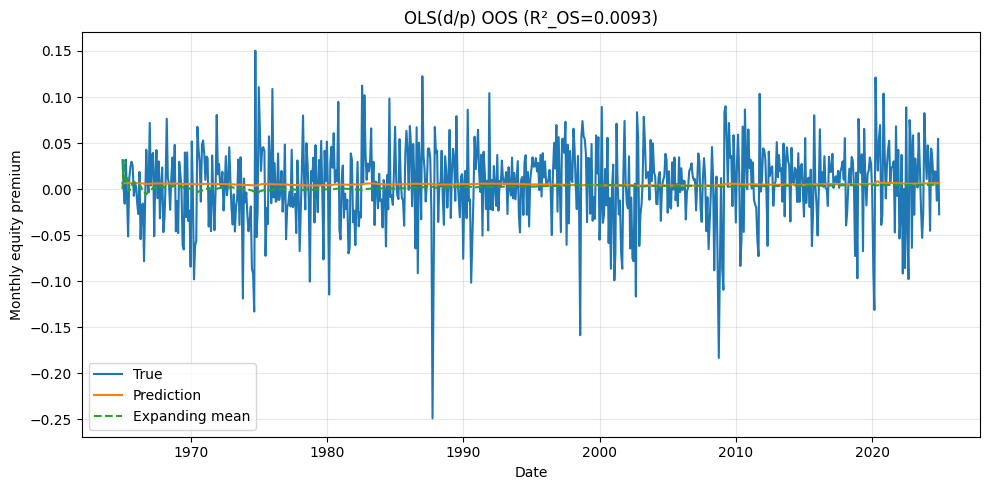

In [6]:

r2_o,stats, y_true_o, y_pred_o, dates_o = modl.ols_oos(data, variables=("ogap",), start_oos="1965-01-01", mode="mean", ct_cutoff = True)
print(r2_o)
print(stats)
modl.plot_oos(
    y_true_o, y_pred_o, dates=dates_o,
    title=f"OLS(d/p) OOS (R²_OS={r2_o:.4f})",
    ylabel="Monthly equity premium",
    mode = "mean"
)


In [2]:
r2_arima, stats_arima, y_true_a, y_pred_a, dates_a = modl.autoarima_oos(
    data,
    target_col="equity_premium",
    start_oos="1965-01-01",
    freq="M",        # or "MS"
    quiet=True,      # to silence the convergence spam
    ct_cutoff=True,
    mode="mean",
)

c:\Users\kilia\Masterarbeit\source\modelling_utils.py:376: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  z = z[~z.index.duplicated(keep="last")].sort_index().asfreq(freq)


1965-01-31 00:00:00
1965-02-28 00:00:00
1965-03-31 00:00:00
1965-04-30 00:00:00
1965-05-31 00:00:00
1965-06-30 00:00:00
1965-07-31 00:00:00
1965-08-31 00:00:00
1965-09-30 00:00:00
1965-10-31 00:00:00
1965-11-30 00:00:00


KeyboardInterrupt: 

c:\Users\kilia\Masterarbeit\source\modelling_utils.py:376: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  z = z[~z.index.duplicated(keep="last")].sort_index().asfreq(freq)


1965-01-31 00:00:00
1965-02-28 00:00:00
1965-03-31 00:00:00
1965-04-30 00:00:00
1965-05-31 00:00:00
1965-06-30 00:00:00
1965-07-31 00:00:00
1965-08-31 00:00:00
1965-09-30 00:00:00
1965-10-31 00:00:00
1965-11-30 00:00:00
1965-12-31 00:00:00
1966-01-31 00:00:00
1966-02-28 00:00:00
1966-03-31 00:00:00
1966-04-30 00:00:00
1966-05-31 00:00:00
1966-06-30 00:00:00
1966-07-31 00:00:00
1966-08-31 00:00:00
1966-09-30 00:00:00
1966-10-31 00:00:00
1966-11-30 00:00:00
1966-12-31 00:00:00
1967-01-31 00:00:00
1967-02-28 00:00:00
1967-03-31 00:00:00
1967-04-30 00:00:00
1967-05-31 00:00:00
1967-06-30 00:00:00
1967-07-31 00:00:00
1967-08-31 00:00:00
1967-09-30 00:00:00
1967-10-31 00:00:00
1967-11-30 00:00:00
1967-12-31 00:00:00
1968-01-31 00:00:00
1968-02-29 00:00:00
1968-03-31 00:00:00
1968-04-30 00:00:00
1968-05-31 00:00:00
1968-06-30 00:00:00
1968-07-31 00:00:00
1968-08-31 00:00:00
1968-09-30 00:00:00
1968-10-31 00:00:00
1968-11-30 00:00:00
1968-12-31 00:00:00
1969-01-31 00:00:00
1969-02-28 00:00:00


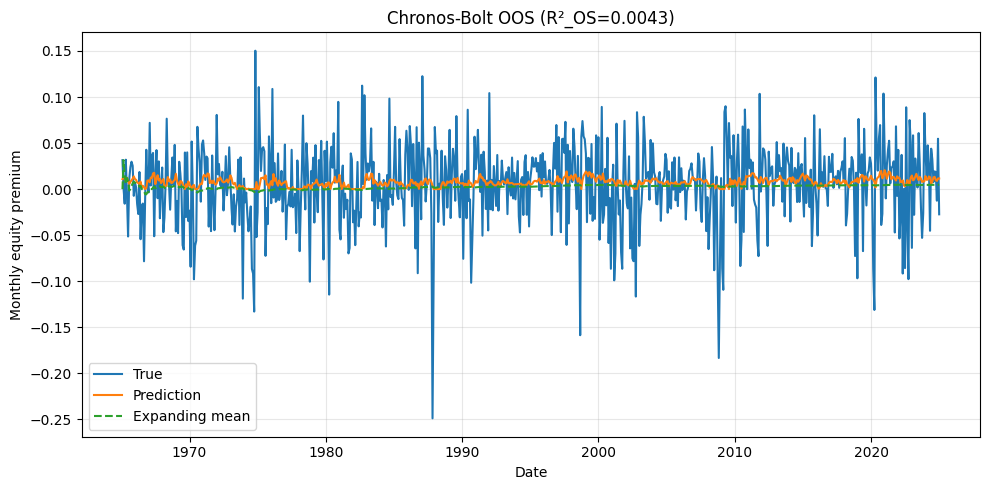

In [5]:

r2_c, stats_c, y_true_c, y_pred_c, dates_c = modl.chronos_oos(
    data, start_oos="1965-01-01", quiet=False, ct_cutoff=True, freq='M', mode="mean"
)
print(r2_c, stats_c)
modl.plot_oos(
    y_true_c, y_pred_c, dates=dates_c,
    title=f"Chronos-Bolt OOS (R²_OS={r2_c:.4f})",
    ylabel="Monthly equity premium",
    mode="mean"
)

In [ ]:
vars_gw = ['d/p','d/y','e/p','tms','dfy','dfr','tbl','ltr','infl','svar','b/m','ntis','cay']
vars_core = ['d/p','e/p','tms','dfy','tbl','ltr','infl','svar','cay']

xgb_params = dict(
    n_estimators=1200, max_depth=2, learning_rate=0.01,
    subsample=0.7, colsample_bytree=0.7, reg_lambda=2.0,
    objective="reg:squarederror", random_state=42
)

r2_t, y_true_t, y_pred_t, dates_t = modl.tree_ensemble_oos(data, variables=vars_core, ct_cutoff=True, model_params=xgb_params, mode = "mean")
    
modl.plot_oos(
    y_true_t, y_pred_t, dates=dates_t,
    title=f"Tree Ensemble OOS (R²_OS={r2_t:.4f})",
    ylabel="Monthly equity premium",mode = "mean"
)

In [17]:
from importlib import reload
reload(modl)

<module 'source.regression_models' from 'c:\\Users\\kilia\\Masterarbeit\\source\\regression_models.py'>

In [3]:
r2_m, y_true_m, y_pred_m, dates_m = modl.moirai2_oos(
    data, covariates=(), start_oos="1965-01-01",
    ctx=240, device="cpu", ct_cutoff=True, quiet=False, mode = "mean"
)

modl.plot_oos(
    y_true_m, y_pred_m, dates=dates_m,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium", mode = "mean"
)

[Moirai2] Using freq='M' (month-end) | ctx=240 | H=1


c:\Users\kilia\Masterarbeit\source\regression_models.py:515: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.sort_index().asfreq(FREQ_STR)


1965-01-31 00:00:00


c:\Users\kilia\AppData\Local\Programs\Python\Python312\Lib\site-packages\gluonts\dataset\common.py:255: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ProcessDataEntry(to_offset(freq), one_dim_target, use_timestamp),


ValueError: not enough values to unpack (expected 3, got 1)

In [8]:
r2_m, y_true_m, y_pred_m, dates_m = modl.moirai2_oos(
    data, covariates=("d/p","tms","dfy"), start_oos="1965-01-01",
    ctx=240, device="cpu", ct_cutoff=True, quiet=False, mode = "mean"
)

modl.plot_oos(
    y_true_m[1], y_pred_m[1], dates=dates_m[1],
    title=f"Moirai-2 OOS (R²_OS={r2_m[1]:.4f})",
    ylabel="Monthly equity premium", mode = "mean"
)

[Moirai2] Using freq='M' (month-end) | ctx=240 | H=1


c:\Users\kilia\Masterarbeit\source\regression_models.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  - For true multi-step forecasts (H>1), you would need a separate driver.


[Moirai 2 (reinstantiated each step)] prediction_length=1, origins=720, first_origin=1965-01-31, last_origin=2024-12-31
1965-01-31 00:00:00


c:\Users\kilia\AppData\Local\Programs\Python\Python312\Lib\site-packages\gluonts\dataset\common.py:255: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ProcessDataEntry(to_offset(freq), one_dim_target, use_timestamp),


ValueError: not enough values to unpack (expected 3, got 1)

In [4]:
r2_tabpfn, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn = modl.tabpfn_oos_fit_each_step(
    data,
    variables=("d/p", "tms", "dfy"),
    start_oos="1965-01-01",
    lag=1,
    min_train=120,
    ct_cutoff=True,
    quiet=False,
    model_params='2.5',  # or just omit this argument,
    )




1965-01-31 00:00:00
1965-02-28 00:00:00
1965-03-31 00:00:00
1965-04-30 00:00:00
1965-05-31 00:00:00


KeyboardInterrupt: 

In [ ]:
r2, y_true, y_pred, dates = modl.tabpfn_advanced_ts_oos(
    data,
    variables=("d/p", "tms", "dfy"),
    target_col="equity_premium",
    lag=3,                  # Use t-1, t-2, t-3
    autoregressive=True,    # Use past returns
    start_oos="1965-01-01",
    model_params = "121"
)

In [ ]:
r2_ts

In [ ]:
modl.plot_oos(
    y_true_tabpfn, y_pred_tabpfn, dates=dates_tabpfn,
    title=f"TabPFN (fit each step) OOS (R²_OS={r2_tabpfn:.4f})",
    ylabel="Monthly equity premium"
)

In [ ]:
r2_pfn_ts, y_true_pfn_ts, y_pred_pfn_ts, dates_pfn_ts = modl.tabpfn_ts_oos_fit_each_step(
    data,
    target_col="equity_premium",
    start_oos="1965-01-01",
    ctx=240,
    freq="M",
    min_windows=120,
    ct_cutoff=False,
    quiet=False,
    fit_kwargs={"epochs": 1}  # if your build supports epochs
)

plot_oos(
    y_true_pfn_ts, y_pred_pfn_ts, dates=dates_pfn_ts,
    title=f"TabPFN-TS (fit each step) OOS (R²_OS={r2_pfn_ts:.4f})",
    ylabel="Monthly equity premium"
)


In [ ]:
!pip install tabpfn-ts

In [ ]:
# Example usage
results = {
    "OLS(d/p)": (r2_o, y_true_o, y_pred_o, dates_o),
    "Chronos": (r2_c[1], y_true_c[1], y_pred_c[1], dates_c[1]),
    "TimesFM": (r2_tf[1], y_true_tf[1], y_pred_tf[1], dates_tf[1]),
}
modl.plot_oos_multi(results)

In [ ]:
from importlib import reload
reload(mm)
import source.modelling_multistep as mm
# 12-step multi-horizon OOS with Chronos
r2_c, y_true_c, y_pred_c, dates_c = mm.chronos_oos_multistep(
    data,
    start_oos="1965-01-01",
    prediction_length=100,
    ct_cutoff=False,
    quiet=False,
    freq="M",
)

# Check R² by horizon
for h in range(1, 13):
    print(f"h={h}: R²_OS = {r2_c[h]:.4f}")

# Plot horizon-1 forecast
h = 1
modl.plot_oos(
    y_true_c[h], y_pred_c[h], dates=dates_c[h],
    title=f"Chronos-Bolt OOS (h={h}, R²_OS={r2_c[h]:.4f})",
    ylabel="Monthly equity premium",
)

# Plot horizon-12 forecast
h = 100
modl.plot_oos(
    y_true_c[h], y_pred_c[h], dates=dates_c[h],
    title=f"Chronos-Bolt OOS (h={h}, R²_OS={r2_c[h]:.4f})",
    ylabel="Monthly equity premium",
)


In [ ]:
from importlib import reload
reload(modl)    
import warnings
warnings.filterwarnings('ignore')  # Suppress all warnings



In [ ]:
base_cols=["d/p", "d/y" ]
base_cols = ["d/p", "d/y" , "e/p", "d/e","svar", "b/m", "ntis","tbl", "ltr", "tms", "dfy", "dfr", "infl"]
fit_fn = modl.make_mlp_lag_reg_fit_predict_fn(
    base_cols=base_cols, n_lags=24, epochs=30, retrain_every=10, print_loss=True
)


r2, y_true, y_pred, dates = modl.expanding_oos_tabular(
    data=data, target_col="equity_premium",
    feature_cols=None,  # ignored by driver when using fit_predict
    start_oos="1965-01-01", start_date="1927-01-01",
    min_train=120, model_name="MLPReg(lags)",
    model_fit_predict_fn=fit_fn, mode="mean"
)
print(f"MLPReg(lags) OOS R²: {r2:.4f}")


In [ ]:
print(f"MLPReg(lags) OOS R²: {r2:.4f}")
print("Ha")

In [ ]:
data.columns

In [ ]:
from importlib import reload    
reload(modl)

In [ ]:
fit_fn = modl.make_lstm_seq_reg_fit_predict_fn(
    feature_cols=["d/p", "d/y"],  # or whatever features you want
    seq_len=24, epochs=20, retrain_every=5
)

r2, y_true, y_pred, dates = modl.expanding_oos_tabular(
    data=data, target_col="equity_premium",
    feature_cols=None,
    start_oos="1965-01-01", start_date="1927-01-01",
    min_train=120, model_name="LSTMReg(seq)",
    model_fit_predict_fn=fit_fn, mode="mean"
)


In [ ]:
fit_fn = modl.make_transformer_seq_reg_fit_predict_fn(
    feature_cols=["d/p", "tms", "dfy"],
    target_col="equity_premium",
    seq_len=24,           # 12–36 are good starting points
    epochs=20,
    retrain_every=5,     # periodic retraining
    d_model=128, nhead=4, num_layers=2,
)

r2, y_true, y_pred, dates = modl.expanding_oos_tabular(
    data=data,
    target_col="equity_premium",
    feature_cols=None,               # ignored when using fit_predict closure
    start_oos="1965-01-01",
    start_date="1927-01-01",
    min_train=120,
    model_name="TransformerReg(seq)",
    model_fit_predict_fn=fit_fn,
    mode="mean",
)
